### Practical_RL week3 homework

In this notebook we'll get more perspective on how value-based methods work. 

We assume that you've already done either seminar_main or seminar_alternative.

To begin with, __please edit qlearning.py__ - just copy your implementation from the first part of this assignment.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

#XVFB will be launched if you run on a server
import os
# if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
#     !bash ../xvfb start
#     %env DISPLAY=:1

## 1. Q-learning in the wild (3 pts)

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2018-03-13 17:06:58,149] Making new env: Taxi-v2


In [3]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        #<train (update) agent for state s>
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

mean reward -8.09


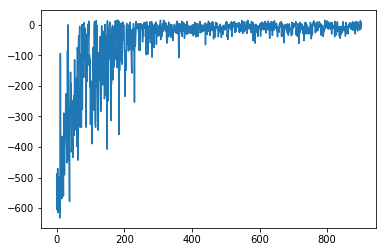

In [5]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

### 1.1 reducing epsilon

Try decreasing agent epsilon over time to make him reach positive score.

The straightforward way to do so is to reduce epsilon every N games:
* either multiply agent.epsilon by a number less than 1 (e.g. 0.99)
* or substract a small value until it reaches 0

You can, of-course, devise other strategies.

__The goal is to reach positive reward!__

In [6]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

mean reward 7.48


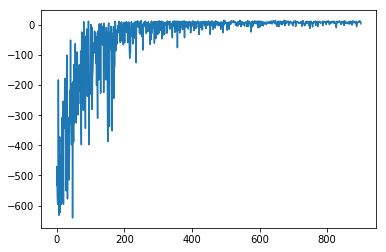

In [7]:
rewards = []
epsilon_reduction = 0.75
for i in range(1000):
    rewards.append(play_and_train(env,agent))   
    if i %100 ==0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

As one can see the positive score of about 7 is stably achived, using reducion of epsilton every 100 games.

## 2. Expected value SARSA (1 pt)

Let's try out expected-value SARSA. You will have to implement EV-SARSA as an agent, resembling the one you used in qlearning.py ,

```<go to expected_value_sarsa.py and implement missing lines in getValue(state)```

__[bonus, 2pt]__ implement EV-SARSA for softmax policy:

$$ \pi(a_i|s) = softmax({Q(s,a_i) \over \tau}) = {e ^ {Q(s,a_i)/ \tau}  \over {\sum_{a_j}  e ^{Q(s,a_j) / \tau }}} $$

In [8]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2018-03-13 17:07:21,451] Making new env: Taxi-v2


In [9]:
from expected_value_sarsa import EVSarsaAgent
agent = EVSarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

### Train EV-SARSA

Note that it uses __the same update parameters as__ qlearning so you adapt use the ```play_and_train``` code above.

Please try both constant epsilon = 0.25 and decreasing epsilon.

mean reward -9.19


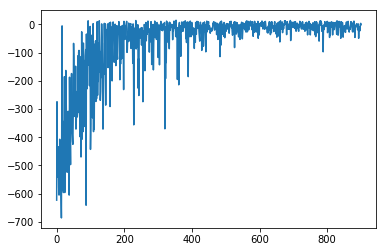

In [10]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))   
    if i %100 ==0:
        #agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

In [11]:
from expected_value_sarsa import EVSarsaAgent
agent = EVSarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

mean reward 7.34


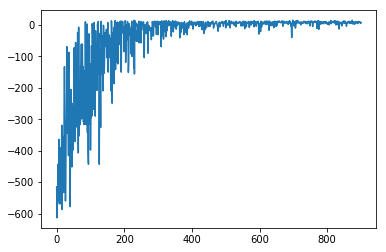

In [12]:
rewards = []
epsilon_reduction = 0.75
for i in range(1000):
    rewards.append(play_and_train(env,agent))   
    if i %100 ==0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

## SOFTMAX EV-SARSA

mean reward 7.2


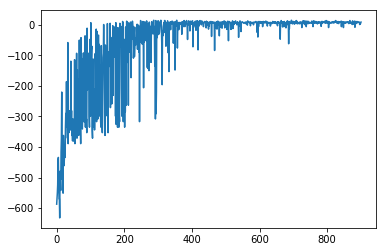

In [13]:
from expected_value_sarsa import EVSarsaAgent
agent = EVSarsaAgent(alpha=0.5,epsilon=2,discount=0.99,
                       getLegalActions = lambda s: range(n_actions), softmax=True)

rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))   
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

Softmax works well! Also, from by observations, tau does not affect the result much.

[2018-03-13 17:07:54,816] Making new env: CartPole-v0


first state:[-0.0345579  -0.03066208  0.01176502 -0.03202053]


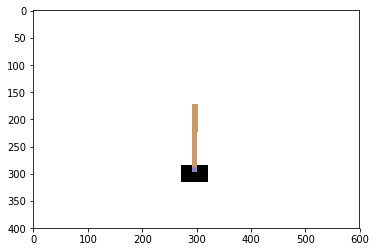

In [14]:
env = gym.make("CartPole-v0").env
env.reset()
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

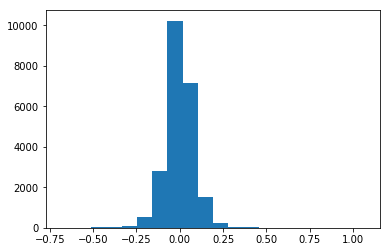

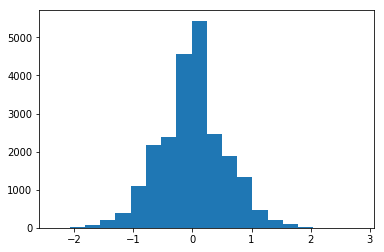

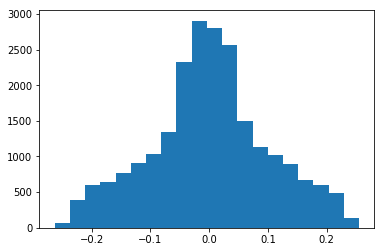

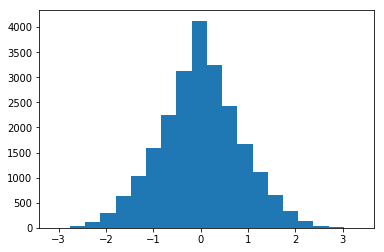

In [15]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

We will persue two ides
- Make a number of possible states for each observable similar to each other
- Replicate the inital shape of the distribution

For this, we first divide each of observable to its distribution maximal length, and then, inroduce scaling parameter, to regulate the number of states we get in the end

In [16]:
range_width = [1., 2.5, 0.25, 3.]
scaling_parameters = [8, 8, 8, 8]

In [17]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):    
        
        #state = <round state to some amount digits.>
        #hint: you can do that with round(x,n_digits)
        #you will need to pick a different n_digits for each dimension
        for index in range(len(state)):
            scalted_state = state[index] / range_width[index] / scaling_parameters[index]
            state[index] = np.round(scalted_state, 2) * range_width[index] * scaling_parameters[index]
        return tuple(state)

In [20]:
env = Binarizer(gym.make("CartPole-v0").env)
env.reset()

[2018-03-13 17:11:22,476] Making new env: CartPole-v0


(-0.0, -0.0, -0.02, 0.0)

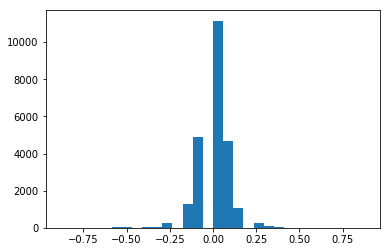

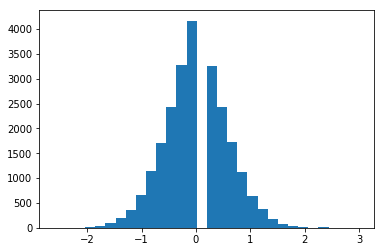

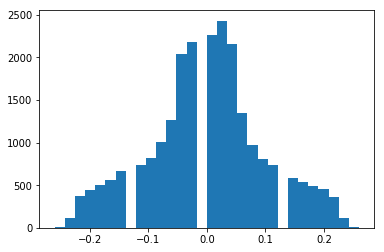

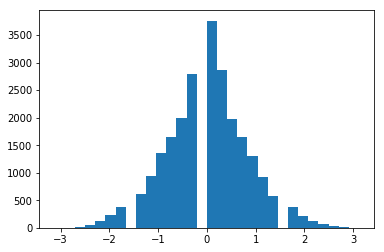

In [21]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:,obs_i],bins=30)
    plt.show()

### Learn

In [22]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

mean reward 370.11


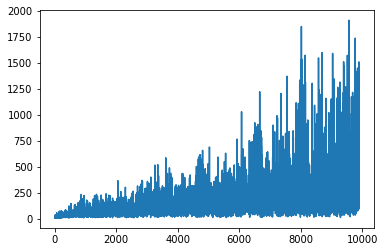

In [23]:
rewards = []
epsilon_reduction = 0.99
for i in range(10000):
    rewards.append(play_and_train(env,agent)) 
    if i % 100 == 0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        

## 3.2 EV-sarsa on CartPole

Now train the `EVSarsaAgent` on CartPole-v0 env with binarizer you used above for Q-learning.

In [24]:
env = Binarizer(gym.make("CartPole-v0").env)
env.reset()
agent = EVSarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

[2018-03-13 17:17:07,254] Making new env: CartPole-v0


mean reward 192.36


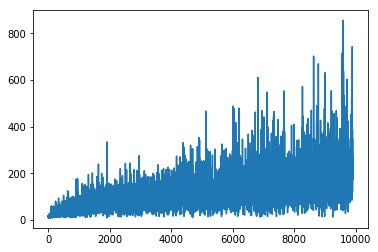

In [25]:
rewards = []
epsilon_reduction = 0.99
for i in range(10000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        

## Softmax EV-SARSA

In [28]:
env = Binarizer(gym.make("CartPole-v0").env)
env.reset()
agent = EVSarsaAgent(alpha=0.5,epsilon=3,discount=0.99,
                       getLegalActions = lambda s: range(n_actions), softmax=True)

[2018-03-13 17:20:23,610] Making new env: CartPole-v0


mean reward 225.04


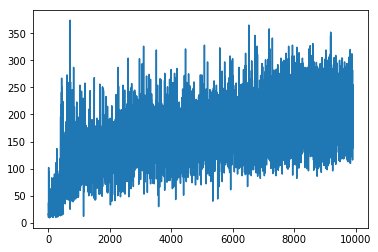

In [29]:
rewards = []
epsilon_reduction = 0.99
for i in range(10000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

In general, EV-SARSA of course look more stable, that Q-learning agent and have much lower minimal score from game to game. On the other hand, Q-larning is more volitile in rewards, but shows better performance on average. Also, softmax SARSA is particulary stable in rewards gained,and grow quite rapidly. In general, I would say Softmax SARSA showed the best result.

## 4. Experience replay (4 pts)

There's a powerful technique that you can use to improve sample efficiency for off-policy algorithms: [spoiler] Experience replay :)

The catch is that you can train Q-learning and EV-SARSA on `<s,a,r,s'>` tuples even if they aren't sampled under current agent's policy. So here's what we're gonna do:

#### Training with experience replay
1. Play game, sample `<s,a,r,s'>`.
2. Update q-values based on `<s,a,r,s'>`.
3. Store `<s,a,r,s'>` transition in a buffer. 
 3. If buffer is full, delete earliest data.
4. Sample K such transitions from that buffer and update q-values based on them.


To enable such training, first we must implement a memory structure that would act like such a buffer.

In [105]:
import random
class ReplayBuffer(object):
    def __init__(self, size):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self._maxsize = size
        self._storage = np.array([((0, 0, 0, 0), 0, 0, (0, 0, 0, 0), 0)] * self._maxsize)
        self._iterator = 0
        self._current_size = 0
        #<any other vars>
        

    def __len__(self):
        return self._current_size

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize. 
        Make sure, FIFO rule is being followed: the oldest examples has to be removed earlier
        '''
        data = (obs_t, action, reward, obs_tp1, done)
        self._storage[self._iterator] = data
        self._iterator = (self._iterator + 1) % self._maxsize
        self._current_size = min(self._current_size + 1, self._maxsize)
        
    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """
        idxes = np.random.choice(len(self), batch_size)
        storage = self._storage
        ###Your code: collect <s,a,r,s',done> for each index
        return storage[idxes, 0], storage[idxes, 1], storage[idxes, 2], storage[idxes, 3], storage[idxes, 4]

Some tests to make sure your buffer works right

In [106]:
replay = ReplayBuffer(2)
obj1 = tuple(range(5))
obj2 = tuple(range(5, 10))
replay.add(*obj1)
assert replay.sample(1)==obj1, "If there's just one object in buffer, it must be retrieved by buf.sample(1)"
replay.add(*obj2)
assert len(replay._storage)==2, "Please make sure __len__ methods works as intended."
replay.add(*obj2)
assert len(replay._storage)==2, "When buffer is at max capacity, replace objects instead of adding new ones."
assert tuple(np.unique(a) for a in replay.sample(100))==obj2
replay.add(*obj1)
assert max(len(np.unique(a)) for a in replay.sample(100))==2
replay.add(*obj1)
assert tuple(np.unique(a) for a in replay.sample(100))==obj1
print ("Success!")

Success!


Now let's use this buffer to improve training:

In [38]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       getLegalActions = lambda s: range(n_actions))
replay = ReplayBuffer(500)

In [95]:
def play_and_train(env,agent,replay,t_max=10**4, batch_size=10):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    #<How you need to modify pipeline in order to use ER?>
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
    
        ###Your code here: store current <s,a,r,s'> transition in buffer
        ###Your code here: train on both current 
        replay.add(s, a, r, next_s, done)
        
        agent.update(s, a, next_s, r)
        for sample_s, sample_a, sample_r, sample_next, sample_done in zip(*replay.sample(batch_size)):
            agent.update(tuple(sample_s), sample_a, tuple(sample_next), sample_r)

        s = next_s
        total_reward += r
        if done:break
    
    return total_reward

Train with experience replay

In [40]:
###Your code: 
# - build a training loop
# - plot learning curves
#<...>

In [41]:
env = Binarizer(gym.make("CartPole-v0").env)
env.reset()
n_actions = env.action_space.n

[2018-03-13 17:41:58,630] Making new env: CartPole-v0


mean reward 357.16


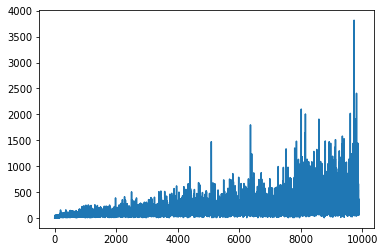

In [42]:
rewards = []
epsilon_reduction = 0.99
for i in range(10000):
    rewards.append(play_and_train(env,agent, replay))    
    if i %100 == 0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        

How you can see, the experience replay gave us some speedup, but not too much. That could happen, because, for example I did not tune parameters of Buffer well enough, or parametets of agent, such as alpha. To have algorithm works quicker, I have to limit buffer size and batch size, which could affect the speed up results a lot.

In [116]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       getLegalActions = lambda s: range(n_actions))
replay = ReplayBuffer(2000)
env = Binarizer(gym.make("CartPole-v0").env)
env.reset()
n_actions = env.action_space.n

[2018-03-13 20:18:32,994] Making new env: CartPole-v0


mean reward 285.8


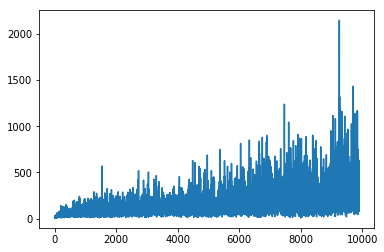

In [117]:
rewards = []
epsilon_reduction = 0.99
for i in range(10000):
    rewards.append(play_and_train(env,agent, replay, batch_size=25))    
    if i %100 == 0:
        agent.epsilon *= epsilon_reduction
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        

### Bonus I: TD($ \lambda $) (5+ points)

There's a number of advanced algorithms you can find in week 3 materials (Silver lecture II and/or reading about eligibility traces). One such algorithm is TD(lambda), which is based on the idea of eligibility traces. You can also view it as a combination of N-step updates for alll N.
* N-step temporal difference from Sutton's book - [url](http://incompleteideas.net/sutton/book/ebook/node73.html)
* Eligibility traces from Sutton's book - [url](http://incompleteideas.net/sutton/book/ebook/node72.html)
* Blog post on eligibility traces - [url](http://pierrelucbacon.com/traces/)



Implementing this algorithm will prove more challenging than q-learning or sarsa, but doing so will earn you a deeper understanding of how value-based methods work [in addition to some bonus points].

More kudos for comparing and analyzing TD($\lambda$) against Q-learning and EV-SARSA in different setups (taxi vs cartpole, constant epsilon vs decreasing epsilon).

### Bonus II: More pacman (5+ points)

Remember seminar_main where your vanilla q-learning had hard time solving Pacman even on a small grid. Now's the time to fix that issue.

We'll focus on those grids for pacman setup.
* python pacman.py -p PacmanQAgent -x N_TRAIN_GAMES -n N_TOTAL_GAMES -l __mediumGrid__
* python pacman.py -p PacmanQAgent -x N_TRAIN_GAMES -n N_TOTAL_GAMES -l __mediumClassic__

Even if you adjust N_TRAIN_GAMES to 10^5 and N_TOTAL_GAMES to 10^5+100 (100 last games are for test), pacman won't solve those environments

The problem with those environments is that they have a large amount of unique states. However, you can devise a smaller environment state by choosing different observation parameters, e.g.:
 * distance and direction to nearest ghost
 * where is nearest food
 * 'center of mass' of all food points (and variance, and whatever)
 * is there a wall in each direction
 * and anything else you see fit 
 
Here's how to get this information from [state](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/pacman.py#L49),
 * Get pacman position: [state.getPacmanPosition()](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/pacman.py#L128)
 * Is there a wall at (x,y)?: [state.hasWall(x,y)](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/pacman.py#L189)
 * Get ghost positions: [state.getGhostPositions()](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/pacman.py#L144)
 * Get all food positions: [state.getCapsules()](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/pacman.py#L153)
 
You can call those methods anywhere you see state.
 * e.g. in [agent.getValue(state)](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/qlearningAgents.py#L52)
 * Defining a function that extracts all features and calling it in [getQValue](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/qlearningAgents.py#L38) and [setQValue](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/qlearningAgents.py#L44) is probably enough.
 * You can also change agent parameters. The simplest way is to hard-code them in [PacmanQAgent](https://github.com/yandexdataschool/Practical_RL/blob/master/week2/assignment/qlearningAgents.py#L140)

Also, don't forget to optimize ```learning_rate```, ```discount``` and ```epsilon``` params of model, this may also help to solve this env.